In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt



In [12]:
ts = pd.read_csv('./point_timeseries/ts_point_0202.csv',parse_dates=True,index_col=0)
ts

,0
2004-01-01,8.11
2004-02-01,8.05
2004-03-01,8.03
2004-04-01,8.32
2004-05-01,8.68
...,...
2019-08-01,12.27
2019-09-01,11.01
2019-10-01,10.10
2019-11-01,8.81


In [11]:
ts.value.rename("AlgoClose")

AttributeError: 'DataFrame' object has no attribute 'value'

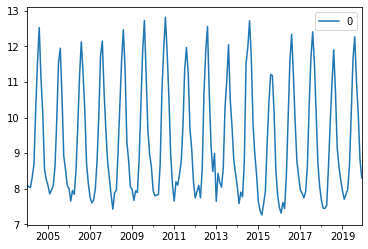

In [13]:
ts.plot()
plt.show()

# Difference

In [14]:
ts['0']

2004-01-01     8.11
2004-02-01     8.05
2004-03-01     8.03
2004-04-01     8.32
2004-05-01     8.68
              ...  
2019-08-01    12.27
2019-09-01    11.01
2019-10-01    10.10
2019-11-01     8.81
2019-12-01     8.30
Name: 0, Length: 192, dtype: float64

In [19]:


ts['diff_1'] = ts['0'].diff(1)
ts['diff_2'] = ts['0'].diff(2)
ts

,0,differ_1,differ_2,diff_1,diff_2
2004-01-01,8.11,NaN,NaN,NaN,NaN
2004-02-01,8.05,-0.06,NaN,-0.06,NaN
2004-03-01,8.03,-0.02,-0.08,-0.02,-0.08
2004-04-01,8.32,0.29,0.27,0.29,0.27
2004-05-01,8.68,0.36,0.65,0.36,0.65
...,...,...,...,...,...
2019-08-01,12.27,0.63,2.17,0.63,2.17
2019-09-01,11.01,-1.26,-0.63,-1.26,-0.63
2019-10-01,10.10,-0.91,-2.17,-0.91,-2.17
2019-11-01,8.81,-1.29,-2.20,-1.29,-2.20


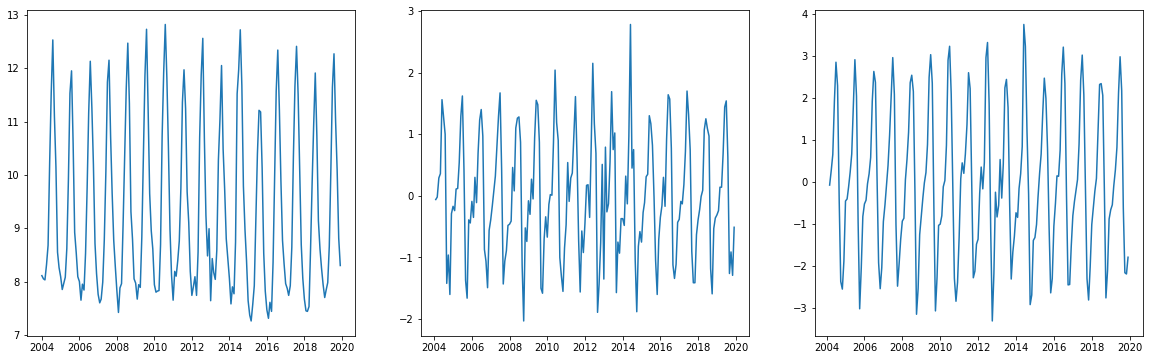

In [20]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(ts['0'])
ax2 = fig.add_subplot(132)
ax2.plot(ts['diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(ts['diff_2'])
plt.show()

# Test Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    
    rolmean = timeseries.rolling(window=12).mean()
    #pd.rolling_mean(timeseries, window=12)
    
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

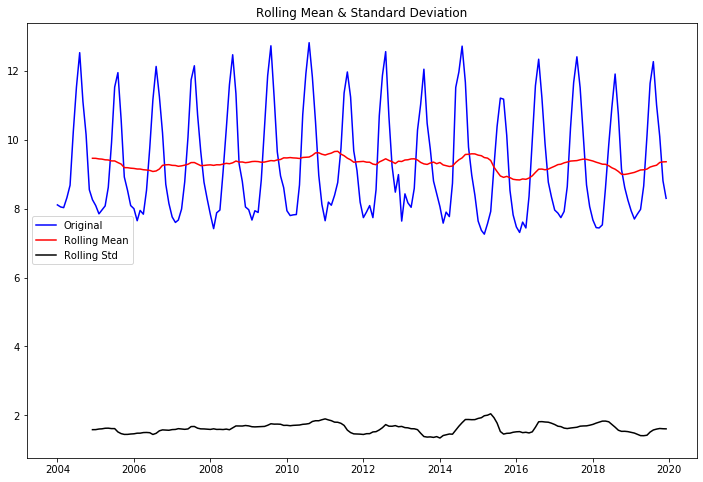

Results of Dickey-Fuller Test:
Test Statistic                  -3.293587
p-value                          0.015168
#Lags Used                      15.000000
Number of Observations Used    176.000000
Critical Value (1%)             -3.468062
Critical Value (5%)             -2.878106
Critical Value (10%)            -2.575602
dtype: float64


In [27]:
test_stationarity(ts['0'].dropna(inplace=False))

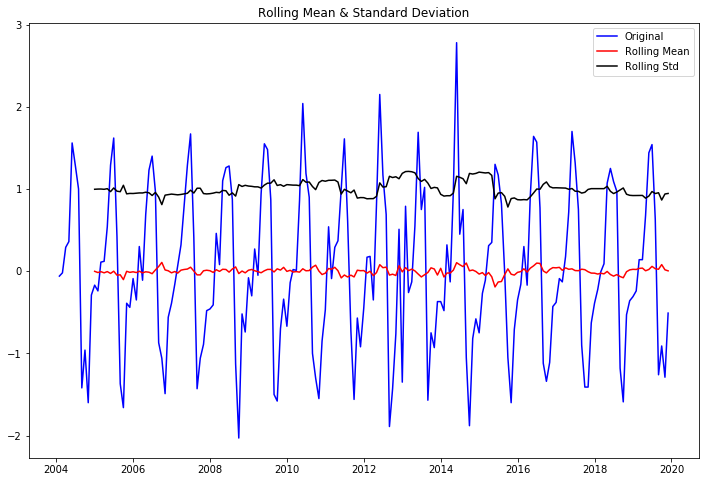

Results of Dickey-Fuller Test:
Test Statistic                -5.947253e+00
p-value                        2.189316e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.770000e+02
Critical Value (1%)           -3.467845e+00
Critical Value (5%)           -2.878012e+00
Critical Value (10%)          -2.575551e+00
dtype: float64


In [28]:
test_stationarity(ts['diff_1'].dropna(inplace=False))

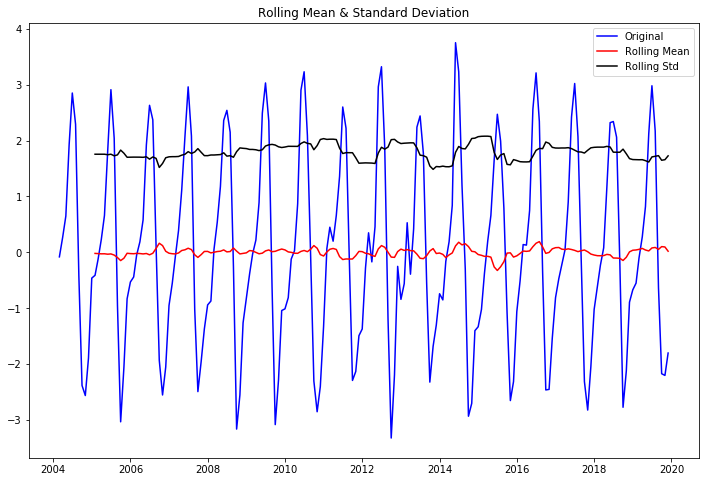

Results of Dickey-Fuller Test:
Test Statistic                -5.817922e+00
p-value                        4.249367e-07
#Lags Used                     1.200000e+01
Number of Observations Used    1.770000e+02
Critical Value (1%)           -3.467845e+00
Critical Value (5%)           -2.878012e+00
Critical Value (10%)          -2.575551e+00
dtype: float64


In [29]:
test_stationarity(ts['diff_2'].dropna(inplace=False))

# Draw Autocorrelation & Partial Autocorrelatio

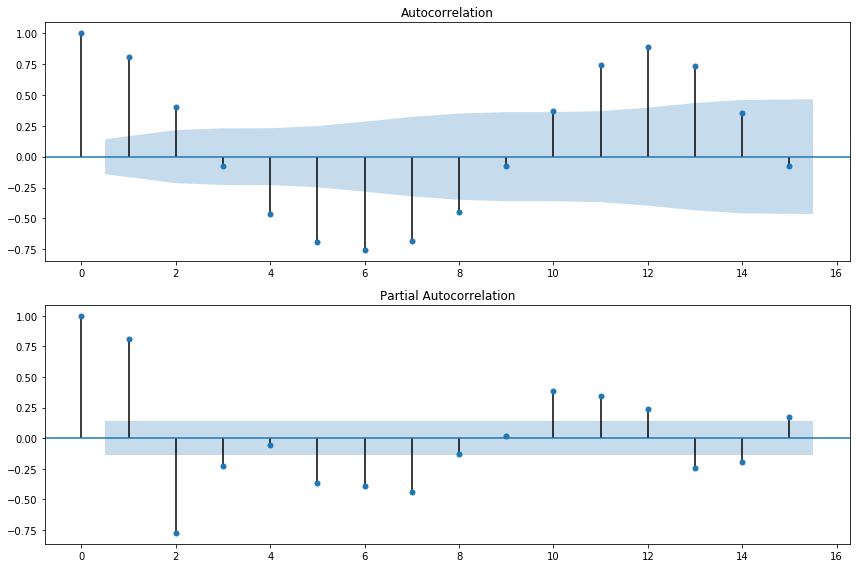

In [35]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts['0'], lags=15,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts['0'], lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


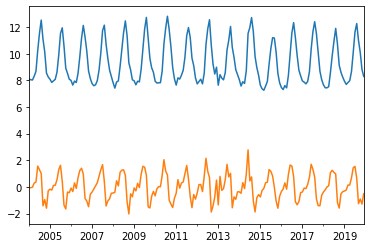

In [39]:
ts['0'].plot()
ts['diff_1'].plot()

In [33]:
ts['diff_1']

2004-01-01     NaN
2004-02-01   -0.06
2004-03-01   -0.02
2004-04-01    0.29
2004-05-01    0.36
              ... 
2019-08-01    0.63
2019-09-01   -1.26
2019-10-01   -0.91
2019-11-01   -1.29
2019-12-01   -0.51
Name: diff_1, Length: 192, dtype: float64

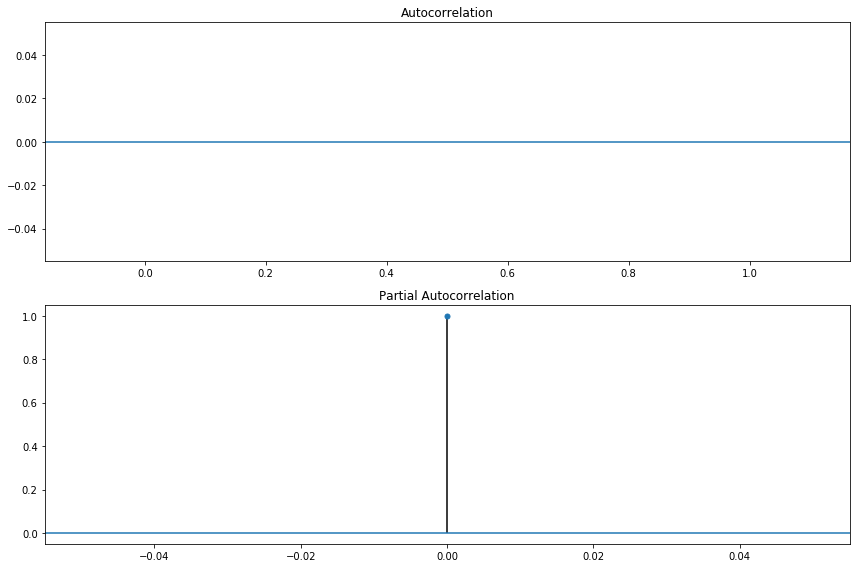

In [38]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts['diff_1'], lags=10,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts['diff_1'], lags=10, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


In [45]:
import warnings
warnings.filterwarnings("ignore")

train_results = sm.tsa.arma_order_select_ic(ts['0'], ic=['aic', 'bic'], trend='nc', max_ar=5, max_ma=5)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)



AIC (3, 5)
BIC (3, 5)


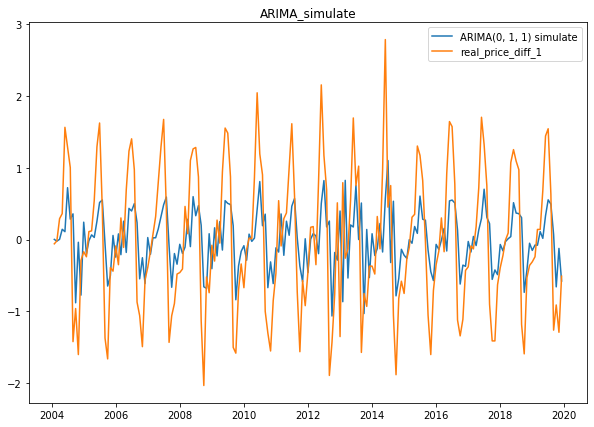

In [48]:
model = sm.tsa.ARIMA(ts['0'], order=(0, 1, 1))
results = model.fit()
# predict_sunspots = results.predict(start=2,end=160,dynamic=False)
predict_sunspots = results.fittedvalues
plt.figure(figsize=(10, 7))
plt.plot(predict_sunspots, label='ARIMA(0, 1, 1) simulate')
plt.plot(ts['diff_1'], label='real_price_diff_1')
plt.title("ARIMA_simulate")
plt.legend(loc='best')
plt.show()

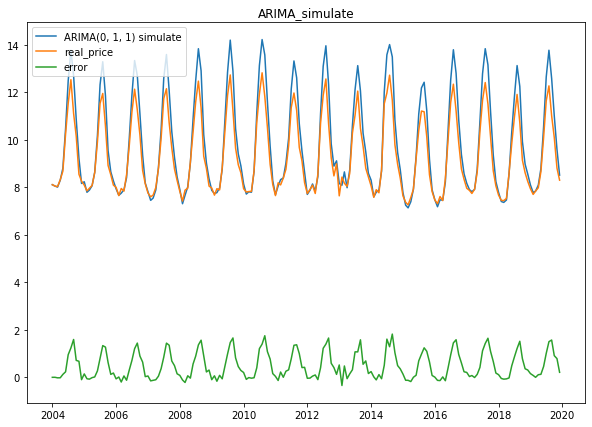

In [49]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(ts['0'], index=ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.figure(figsize=(10, 7))
plt.plot(predictions_ARIMA, label='ARIMA(0, 1, 1) simulate')
plt.plot(ts['0'],label='real_price')
plt.plot(predictions_ARIMA - ts['0'],label='error')

plt.title("ARIMA_simulate")
plt.legend(loc='best')


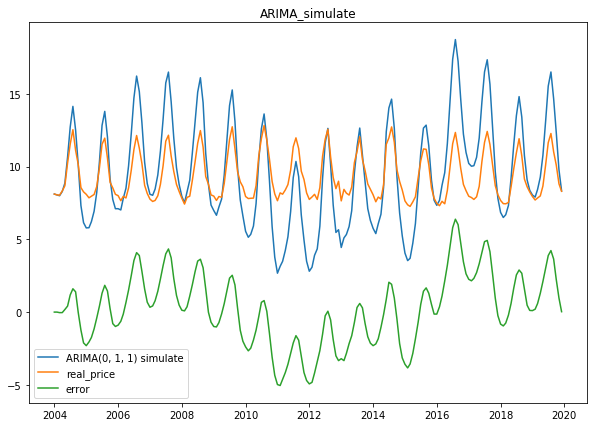

In [55]:
model = sm.tsa.ARIMA(ts['0'], order=(2, 1, 4))
results = model.fit()
# predict_sunspots = results.predict(start=2,end=160,dynamic=False)
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(ts['0'], index=ts.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.figure(figsize=(10, 7))
plt.plot(predictions_ARIMA, label='ARIMA(0, 1, 1) simulate')
plt.plot(ts['0'],label='real_price')
plt.plot(predictions_ARIMA - ts['0'],label='error')

plt.title("ARIMA_simulate")
plt.legend(loc='best')
